In [1]:
import sys
import numpy as np
import copy
%matplotlib nbagg
import matplotlib.pyplot as plt

pulse_building_folder = '/Users/natalie/Documents/PhD/Qdev/QcodesRelated/PulseBuilding'
if pulse_building_folder not in sys.path:
    sys.path.insert(0, pulse_building_folder)

from pulse_building import Waveform, Element, Sequence, Segment

## First without segments:

### Readout Settings

In [34]:
p_dict = {'sample_rate': 1e9,
          'pulse_end': 2e-6,
          'pulse_readout_delay': 0,
          'marker_readout_delay': 0, 
          'readout_time': 1e-6, 
          'marker_time': 0.6e-6,
          'cycle_duration': 4e-6,
}

In [28]:
readout_start = p_dict['pulse_end'] + p_dict['pulse_readout_delay']
resolution = 1 / p_dict['sample_rate']

readout_start_points = round(readout_start / resolution)
readout_points = round(p_dict['readout_time'] / resolution)

total_points = round(p_dict['cycle_duration'] / resolution)
marker_points = round(p_dict['marker_time'] / resolution)

pulse_end_points = round(p_dict['pulse_end'] / resolution)

readout_waveform = Waveform(length=total_points, channel=2)
readout_waveform.wave[readout_start_points:readout_start_points + readout_points] = 1
readout_waveform.set_marker(1, readout_start_points, readout_start_points + marker_points)
readout_waveform.set_marker(2, readout_start_points, readout_start_points + marker_points)

### Rabi

In [29]:
rabi_sequence = Sequence(name='rabi',
                         variable='qubit pulse duration',
                         variable_unit='s',
                         step=1e-6,
                         start=0,
                         stop=5e-6)

qubit_duration_array_points = np.round(rabi_sequence.variable_array / resolution).astype(int)

for i, qubit_points in enumerate(qubit_duration_array_points):
    element = Element()
    element.add_waveform(readout_waveform)
    qubit_waveform = Waveform(length=total_points, channel=1)
    if i == 0:
        qubit_waveform.set_marker(1, 0, marker_points)
    qubit_start = pulse_end_points - qubit_points
    qubit_end = pulse_end_points
    qubit_waveform.wave[qubit_start:qubit_end] = 1
    element.add_waveform(qubit_waveform) 
    rabi_sequence.add_element(element)

# rabi_sequence.check()
print(len(rabi_sequence.variable_array), len(rabi_sequence))

6 6


## T1

In [30]:
t1_sequence = Sequence(name='t1',
                       variable='pi pulse readout delay',
                       variable_unit='s',
                       step=0.5e-6,
                       start=0,
                       stop=20e-6)

qubit_time = 1e-6
qubit_points = round(qubit_time / resolution)
delay_array_points = np.round(t1_sequence.variable_array / resolution).astype(np.int)

for i, delay_points in enumerate(delay_array_points):
    element = Element()
#     element.add_waveform(readout_waveform)
    qubit_waveform = Waveform(length=total_points, channel=1)
    if i == 0:
        qubit_waveform.set_marker(1, 0, marker_points)
    qubit_start = pulse_end_points - delay_points - qubit_points
    qubit_end = pulse_end_points - delay_points
    qubit_waveform.wave[qubit_start:qubit_end] = 1
    element.add_waveform(qubit_waveform) 
    t1_sequence.add_element(element)

# t1_sequence.check()
print(len(t1_sequence.variable_array), len(t1_sequence))

41 41


### Plot here

<IPython.core.display.Javascript object>


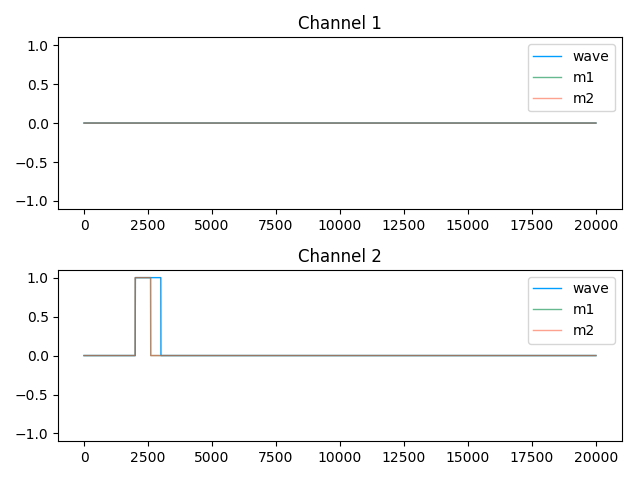

In [33]:
pl = plot_sequence(rabi_sequence, elemnum=4, channels=[1,2])

## Now with segments